<a href="https://colab.research.google.com/github/comaserious/deep_learning_practice/blob/main/%EA%B5%B0%EC%A7%91%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
kmeans_model = KMeans(n_clusters=3, random_state=0 , init='k-means++', max_iter=300)
kmeans_model.fit(iris_df)

KMeans(n_clusters=3, random_state=0)

In [7]:
kmeans_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [8]:
iris_df['cluster'] = kmeans_model.labels_
iris_df['target']= iris_data.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,target
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0


In [9]:
iris_df['cluster'].value_counts()

,count
cluster,
0,61
1,50
2,39


In [10]:
iris_df['target'].value_counts()

,count
target,
0,50
1,50
2,50


실제 데이터는 각가 50개씩 분포 해 있지만 cluster 는 그렇지 못하고 있다

In [11]:
from sklearn.decomposition import PCA

pca= PCA(n_components=2)
pca_transformed = pca.fit_transform(iris_df.iloc[:,0:4])
pca_transformed

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [13]:
iris_df['pca_x']=pca_transformed[:,0]
iris_df['pca_y'] = pca_transformed[:,1]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,1,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,1,0,-2.728717,0.326755


In [18]:
marker_data=[]
marker0 = iris_df[iris_df['cluster']==0].index
marker_data.append(marker0)
marker0

Index([ 51,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 101, 106, 113, 114, 119, 121, 123, 126, 127,
       133, 138, 142, 146, 149],
      dtype='int64')

In [19]:
marker1 = iris_df[iris_df['cluster']==1].index
marker_data.append(marker1)
marker1

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype='int64')

In [20]:
marker2 = iris_df[iris_df['cluster']==2].index
marker_data.append(marker2)
marker2

Index([ 50,  52,  77, 100, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112,
       115, 116, 117, 118, 120, 122, 124, 125, 128, 129, 130, 131, 132, 134,
       135, 136, 137, 139, 140, 141, 143, 144, 145, 147, 148],
      dtype='int64')

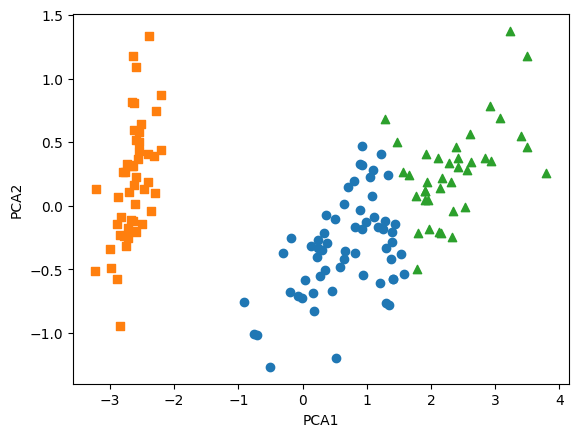

In [21]:
markers = ['o', 's' , '^']

for i , marker in enumerate(markers):
  plt.scatter(x=iris_df.loc[marker_data[i],'pca_x'], y=iris_df.loc[marker_data[i], 'pca_y'], marker=marker) # loc[행, 열]

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [23]:
from sklearn.datasets import make_blobs
x,y=make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.9, shuffle=True, random_state=0)
x

array([[-1.71311732,  3.71004328],
       [ 0.66314914,  4.4445014 ],
       [ 1.11572276,  4.6441336 ],
       [-1.43895154,  3.44254057],
       [ 1.24468444,  5.49753463],
       [-0.83097633,  1.85238969],
       [ 2.52422591,  0.37945449],
       [ 1.60703832,  2.63424251],
       [ 1.09049096,  4.66557775],
       [-1.69849216,  2.5625177 ],
       [ 0.61341083,  5.40398789],
       [-0.90250818,  2.77426617],
       [ 1.66120403,  4.41329484],
       [ 1.33267612,  3.32003197],
       [ 0.15970155,  4.35053818],
       [-1.01634276,  2.71747467],
       [ 2.76296269,  0.47788647],
       [ 2.18302537,  0.61026808],
       [ 0.24443842,  2.75013299],
       [-3.35452003,  4.77592584],
       [-1.00623467,  3.23257127],
       [ 1.38498818,  0.15386898],
       [ 1.01745274,  4.13532186],
       [ 1.82879685,  4.16427824],
       [-3.55691182,  1.9976261 ],
       [-0.47623798,  4.11232108],
       [ 1.47601096, -1.10339918],
       [-2.21463354,  1.62386993],
       [-0.75477248,

In [24]:
y

array([2, 0, 0, 2, 0, 2, 1, 1, 0, 2, 0, 2, 0, 0, 0, 2, 1, 1, 0, 2, 2, 1,
       0, 0, 2, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 0, 0, 2, 2, 0, 1, 1, 2,
       1, 1, 2, 1, 1, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 0, 2,
       0, 1, 2, 2, 1, 0, 1, 0, 0, 2, 2, 1, 1, 0, 2, 0, 2, 0, 1, 0, 0, 1,
       0, 2, 1, 2, 0, 0, 0, 1, 2, 2, 1, 1, 2, 0, 1, 0, 2, 1, 2, 0, 2, 1,
       1, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 1, 2, 2, 2,
       0, 1, 1, 1, 0, 0, 2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 1, 0, 1, 2, 2,
       0, 2, 0, 1, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 2, 2, 1, 1, 1, 1, 2, 1,
       0, 1])

In [25]:
cluster_df = pd.DataFrame(data=x, columns=['ftr1','ftr2'])
cluster_df['target']=y
cluster_df.head()

,ftr1,ftr2,target
0,-1.713117,3.710043,2
1,0.663149,4.444501,0
2,1.115723,4.644134,0
3,-1.438952,3.442541,2
4,1.244684,5.497535,0


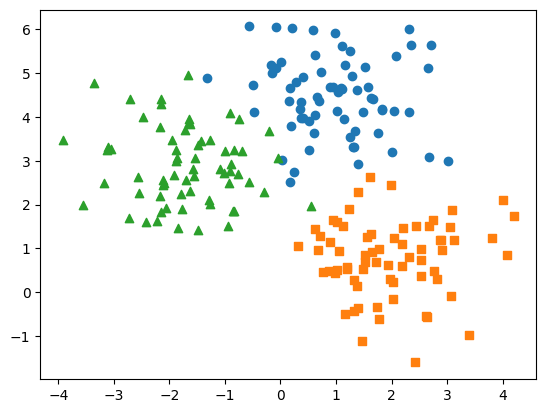

In [32]:
mark = ['o', 's' , '^']
for i in range(0,3):
  markers = cluster_df[cluster_df['target']==i].index

  plt.scatter(x=cluster_df.loc[markers,'ftr1'], y=cluster_df.loc[markers,'ftr2'], marker=mark[i])

plt.xlabel='PCA1'
plt.ylabel='PCA2'
plt.show()

In [33]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [38]:
iris_df = pd.DataFrame(data = iris_data.data, columns = iris_data.feature_names )
kmeans_model = KMeans(n_clusters=4, random_state=0, init='k-means++', max_iter=300)
kmeans_model.fit(iris_df)
iris_df['cluster'] = kmeans_model.labels_
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,2


In [41]:
score_sample = silhouette_samples(iris_data.data, iris_df['cluster'])
score_sample


array([ 8.27850261e-01,  7.80213658e-01,  7.98483765e-01,  7.66937963e-01,
        8.23961544e-01,  7.08362065e-01,  7.89382243e-01,  8.27334660e-01,
        7.04315348e-01,  7.91770454e-01,  7.71832126e-01,  8.04816278e-01,
        7.74673481e-01,  7.02414317e-01,  6.65981082e-01,  6.02406112e-01,
        7.43387594e-01,  8.25339462e-01,  6.62516592e-01,  7.91029121e-01,
        7.44647978e-01,  7.96450259e-01,  7.61029129e-01,  7.52223126e-01,
        7.28396949e-01,  7.57686840e-01,  8.01549729e-01,  8.14588341e-01,
        8.16635342e-01,  7.81748762e-01,  7.77907003e-01,  7.63650007e-01,
        7.28762824e-01,  6.86399559e-01,  7.95455149e-01,  8.03280549e-01,
        7.62090186e-01,  8.15377759e-01,  7.25730123e-01,  8.23365768e-01,
        8.23968141e-01,  5.68360076e-01,  7.48180614e-01,  7.62495883e-01,
        7.00840712e-01,  7.72856292e-01,  7.82505515e-01,  7.85317665e-01,
        7.88837614e-01,  8.25430071e-01,  3.44587939e-01,  4.23328070e-01,
        3.28361575e-01,  

# Silhouette Coefficient 설명
실루엣 계수는 -1과 1 사이의 값을 가지며, 군집의 품질을 다음과 같이 평가합니다:
- 1에 가까울수록: 샘플이 잘 군집화되어 있고, 자신의 군집에 잘 속한다고 평가됩니다.
- 0에 가까운 값: 샘플이 두 군집의 경계에 위치하여 군집화가 명확하지 않다고 평가됩니다.
- -1에 가까운 값: 샘플이 잘못된 군집에 속해 있다고 평가됩니다.


# silhouette_samples 함수
silhouette_samples는 각 샘플에 대해 실루엣 계수를 계산합니다. 이 함수는 군집화 품질을 평가하거나 군집화의 잘못된 분류를 발견하는 데 유용합니다.


# X는 데이터, labels는 군집화된 레이블
silhouette_values = silhouette_samples(X, labels)


In [42]:
iris_df['silhouette_coeff']= score_sample
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.827850
1,4.9,3.0,1.4,0.2,1,0.780214
2,4.7,3.2,1.3,0.2,1,0.798484
3,4.6,3.1,1.5,0.2,1,0.766938
4,5.0,3.6,1.4,0.2,1,0.823962


In [44]:
avg_score = silhouette_score(iris_data.data, iris_df['cluster'])
avg_score

0.49805050499728737

In [45]:
iris_df.groupby('cluster')['silhouette_coeff'].mean()

,silhouette_coeff
cluster,
0,0.419518
1,0.763176
2,0.321324
3,0.362998


In [46]:
from yellowbrick.cluster import SilhouetteVisualizer

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


<bound method Visualizer.poof of SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(n_clusters=4, random_state=0))>

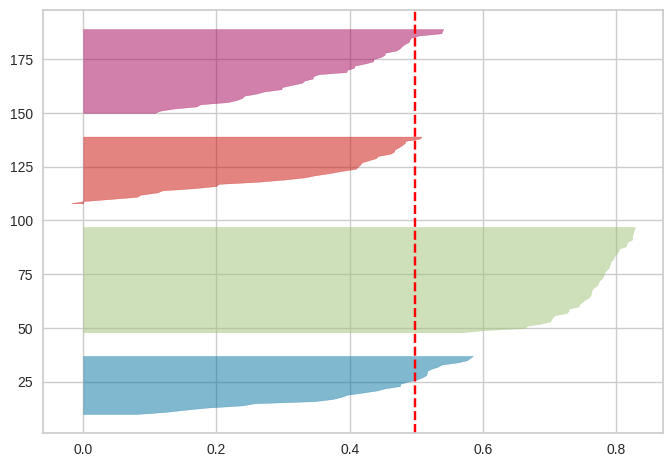

In [47]:
visualize = SilhouetteVisualizer(kmeans_model, colors='yellowbrick')
visualize.fit(iris_data.data)
visualize.poof

In [48]:
from sklearn.datasets import make_circles
x, y = make_circles(n_samples=1000 , shuffle=True, noise = 0.05 , random_state= 0 , factor=0.5)

cluster_df = pd.DataFrame(data=x , columns =['ftr1' , 'ftr2'])
cluster_df['target'] = y
cluster_df

,ftr1,ftr2,target
0,0.519781,-0.015981,1
1,-0.057719,-0.420279,1
2,-0.805155,-0.662227,0
3,0.316549,0.312730,1
4,-0.304804,0.407563,1
...,...,...,...
995,-0.222906,-0.326809,1
996,-0.766648,0.677558,0
997,-0.012036,0.396755,1
998,0.398129,0.318982,1


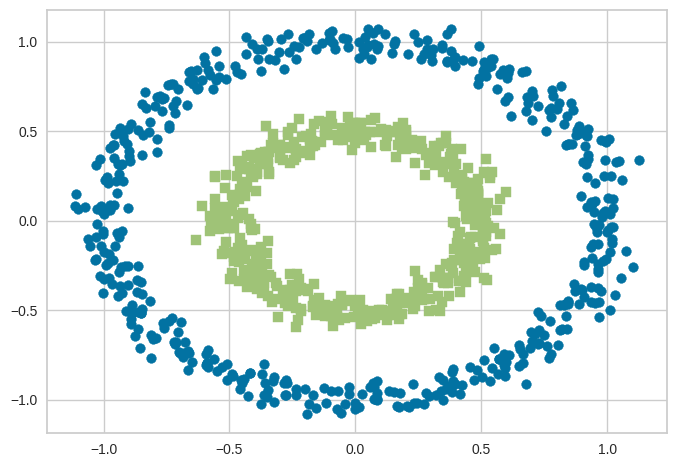

In [50]:
plt.scatter(x=cluster_df[cluster_df['target']==0]['ftr1'], y = cluster_df[cluster_df['target']==0]['ftr2'] , marker='o')
plt.scatter(x=cluster_df[cluster_df['target']==1]['ftr1'], y = cluster_df[cluster_df['target']==1]['ftr2'] , marker='s')

target 이 원의 지름을 보여주는거 같다

In [53]:
kmeans_model = KMeans(n_clusters=2 , random_state =0 , init='k-means++', max_iter=300)
kmeans_model.fit(x)

KMeans(n_clusters=2, random_state=0)

In [55]:
kmeans_model.labels_

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,

In [57]:
cluster_df['cluster'] = kmeans_model.labels_
cluster_df

,ftr1,ftr2,target,cluster
0,0.519781,-0.015981,1,0
1,-0.057719,-0.420279,1,0
2,-0.805155,-0.662227,0,1
3,0.316549,0.312730,1,0
4,-0.304804,0.407563,1,1
...,...,...,...,...
995,-0.222906,-0.326809,1,0
996,-0.766648,0.677558,0,1
997,-0.012036,0.396755,1,1
998,0.398129,0.318982,1,0


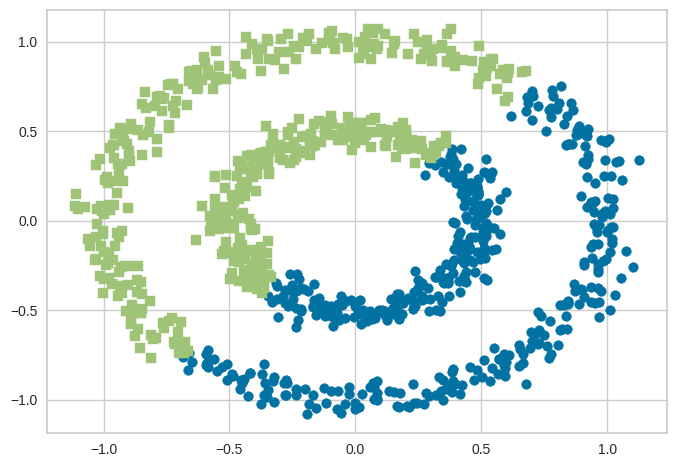

In [58]:
cluster0 = cluster_df[cluster_df['cluster']==0]
cluster1 = cluster_df[cluster_df['cluster']==1]

plt.scatter(x=cluster0['ftr1'], y=cluster0['ftr2'] , marker='o')
plt.scatter(x=cluster1['ftr1'], y=cluster1['ftr2'], marker='s')
plt.show()

In [59]:
from sklearn.cluster import DBSCAN

In [60]:
dbscan_model = DBSCAN(eps=0.2, min_samples=10)
dbscan_model.fit(x)
cluster_df['cluster_dbscan']=dbscan_model.labels_
cluster_df

,ftr1,ftr2,target,cluster,cluster_dbscan
0,0.519781,-0.015981,1,0,0
1,-0.057719,-0.420279,1,0,0
2,-0.805155,-0.662227,0,1,1
3,0.316549,0.312730,1,0,0
4,-0.304804,0.407563,1,1,0
...,...,...,...,...,...
995,-0.222906,-0.326809,1,0,0
996,-0.766648,0.677558,0,1,1
997,-0.012036,0.396755,1,1,0
998,0.398129,0.318982,1,0,0


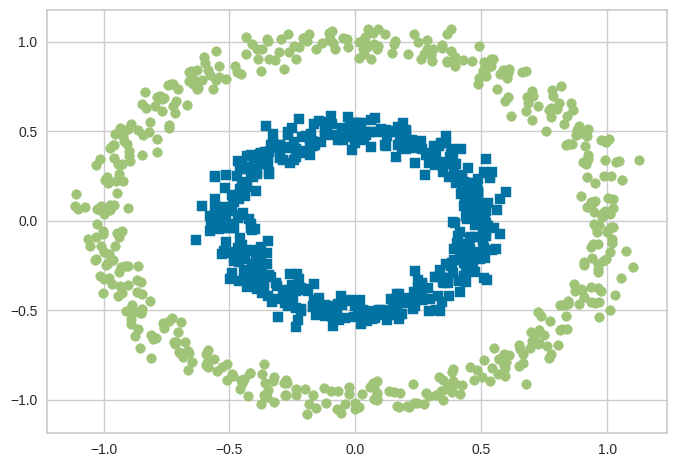

In [61]:
cluster0 = cluster_df[cluster_df['cluster_dbscan']==0]
cluster1 = cluster_df[cluster_df['cluster_dbscan']==1]

plt.scatter(x = cluster0['ftr1'], y=cluster0['ftr2'], marker='s')
plt.scatter(x=cluster1['ftr1'], y=cluster1['ftr2'], marker='o')
plt.show()

우리가 원하는 대로 클러스터가 잘된것을 확인할 수 있다.ㅡ

# kmeans 와 DBscan 은 무엇이 다른가?

## KMeans (K-Means)
 - 군집 수를 미리 지정하고 그에 맞춰 데이터를 군집화하는 알고리즘입니다.
 - 군집 중심(centroids)을 기준으로 군집을 형성합니다.
 - 군집의 형태가 구형(혹은 원형)이라고 가정하며, 모든 군집은 동일한 크기와 밀도를 가질 것으로 예상합니다.

### 작동 원리
 1. 초기 군집 중심(centroid)을 랜덤하게 선택합니다.
 2. 각 데이터를 가장 가까운 군집 중심에 할당합니다.
 3. 각 군집에 대해 군집 중심을 재계산합니다.
 4. 2번과 3번을 수렴할 때까지 반복합니다.

### 특징
 1. 군집의 수 (K)를 미리 지정해야 합니다.
 2. 구형 군집에 적합하며, 밀도가 고르지 않은 군집에는 적합하지 않습니다.
 3. 이상치(outliers)를 처리하지 않으며, 군집의 경계가 항상 직선입니다.
 4. 군집의 크기나 형태가 동일하거나 유사한 경우에 잘 동작합니다.

### 장점
 1. 비교적 간단하고 빠르게 작동합니다.
 2. 큰 데이터셋에서도 효율적으로 처리할 수 있습니다.

### 단점
 1. 군집의 개수를 미리 지정해야 합니다.
 2. 군집의 형태가 구형이라고 가정하기 때문에 비구형 군집에는 적합하지 않습니다.
 3. 이상치에 민감합니다.

## DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
 - 밀도 기반 군집화 알고리즘으로, 군집의 수를 미리 지정할 필요가 없습니다.
 - 군집의 형태에 제한이 없으며, 자유로운 형태의 군집을 찾습니다.
 - 이상치(outliers)를 별도로 분리할 수 있습니다.

### 작동 원리
1. 밀도를 기준으로 군집을 형성합니다. DBSCAN은 두 중요한 매개변수를 사용합니다:
 - eps: 두 점 사이의 최대 거리. 이 값 내에 다른 점들이 있으면 같은 군집으로 묶습니다.
 - min_samples: 군집을 형성하기 위해 최소한 필요한 이웃의 수.

2. 핵심 점(core point): eps 거리 내에 최소 min_samples 개 이상의 이웃이 있는 점.
3. 경계 점(border point): 핵심 점의 이웃이지만, 자체적으로는 핵심 점이 아닌 점.
4 .이상치(noise point): 핵심 점이나 경계 점이 아닌 점.

군집은 핵심 점을 기준으로 형성되고, 경계 점은 해당 군집에 속하게 됩니다. 이상치는 군집에 포함되지 않습니다.

### 특징
1. 군집의 수를 미리 지정할 필요가 없고, 밀도가 높은 지역을 찾아 군집을 형성합니다.
2. 비구형 군집, 불규칙한 형태의 군집을 잘 처리할 수 있습니다.
3. 이상치(outliers)를 별도로 처리할 수 있습니다.
4. 밀도가 낮은 지역에서 군집을 형성하지 않으며, 군집의 모양이 자유롭습니다.

### 장점
1. 군집의 수를 미리 정할 필요가 없습니다.
2. 비구형, 불규칙한 군집을 잘 처리합니다.
3. 이상치(outliers)를 식별하고 처리할 수 있습니다.
4. 군집의 밀도 차이를 잘 구분할 수 있습니다.

### 단점
1. eps와 min_samples를 적절하게 설정해야 합니다. 이 값에 따라 군집화 결과가 크게 달라질 수 있습니다.
2. 밀도가 매우 고르지 않은 데이터에서는 성능이 떨어질 수 있습니다.
3. KMeans보다는 계산 비용이 더 많이 들 수 있습니다.